# **Car Price Prediction with Machine Learning**
---
                                                                 Name : VISHNU E
                                                                 Organization : Oasis Infobyte
                                                                 Date : 30/10/2024

## **Problem Statement**
---

Build machine learning models to predict car prices based on given features.

### Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [26]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Exploratory Data Analysis

In [27]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [28]:
# statistical summary of the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [29]:
# checking for null values

df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [30]:
# checking for duplicate values

df.duplicated().sum()

2

In [31]:
# Show all duplicate rows, including the first occurrence
display_duplicate_rows = df[df.duplicated(keep=False)]

# Display all duplicates
print(display_duplicate_rows)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
17    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
15       Dealer       Manual      0  
17       Dealer       Manual      0  
51       Dealer    Automatic      0  
93       Dealer    Automatic      0  


In [32]:
# removing duplicate rows

df_cleaned = df.drop_duplicates(keep = 'first')
df_cleaned

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


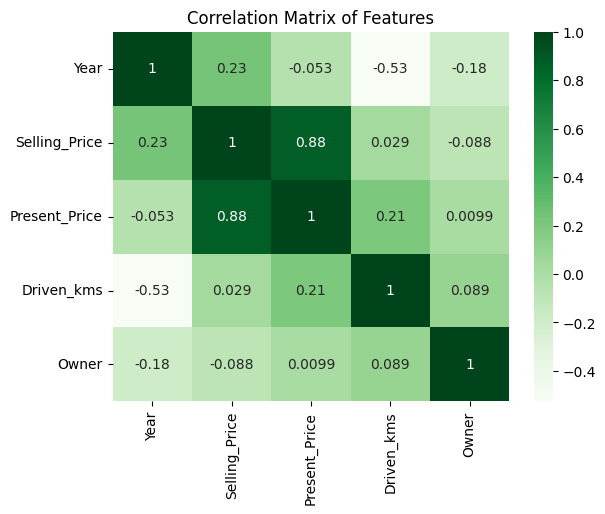

In [33]:
# correlation matrix

sns.heatmap(df_cleaned.corr(numeric_only = True), annot = True, cmap = 'Greens')
plt.title('Correlation Matrix of Features')
plt.show()

<Axes: xlabel='Year', ylabel='Selling_Price'>

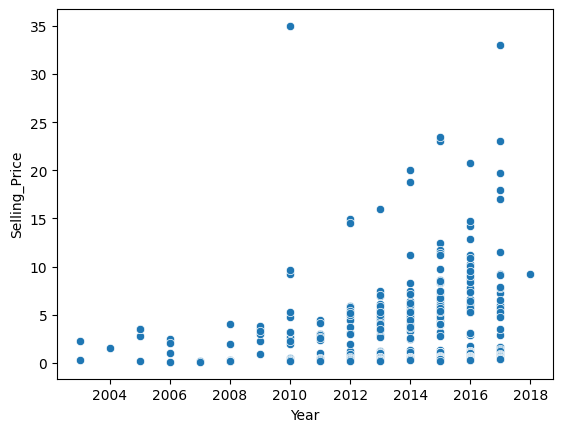

In [34]:
# scatterplot - Year vs Selling price

sns.scatterplot(x= 'Year', y = 'Selling_Price', data = df_cleaned)

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


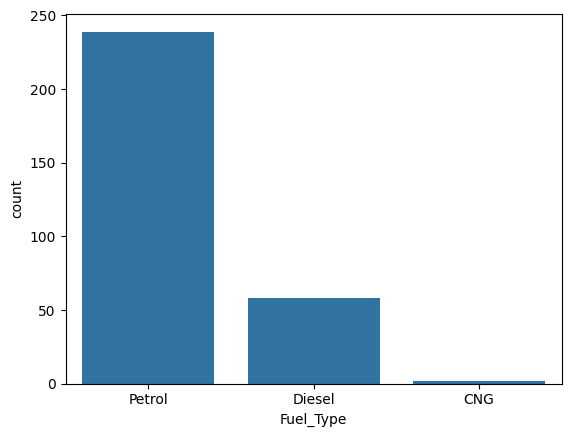

In [35]:
# Fuel type distribution

sns.countplot(x = 'Fuel_Type', data = df_cleaned)
print(df_cleaned['Fuel_Type'].value_counts())

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


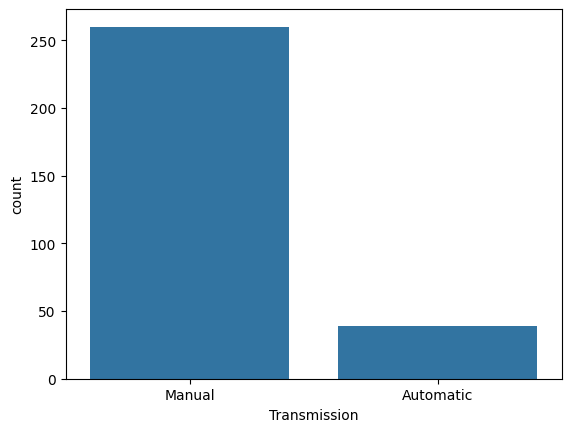

In [36]:
# Transmission distribution

sns.countplot(x = 'Transmission', data = df_cleaned)
print(df_cleaned['Transmission'].value_counts())

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64


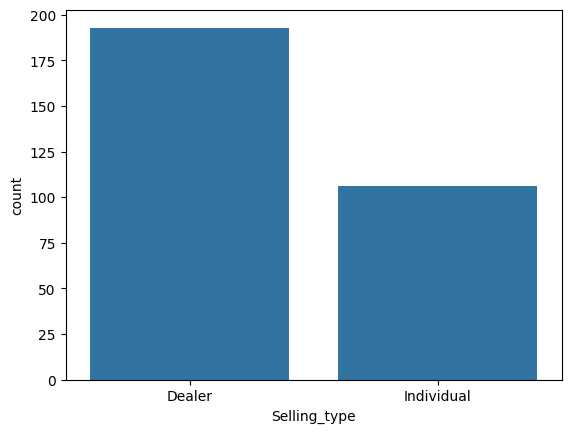

In [37]:
# Selling type distribution

sns.countplot(x = 'Selling_type', data = df_cleaned)
print(df_cleaned['Selling_type'].value_counts())

Owner
0    288
1     10
3      1
Name: count, dtype: int64


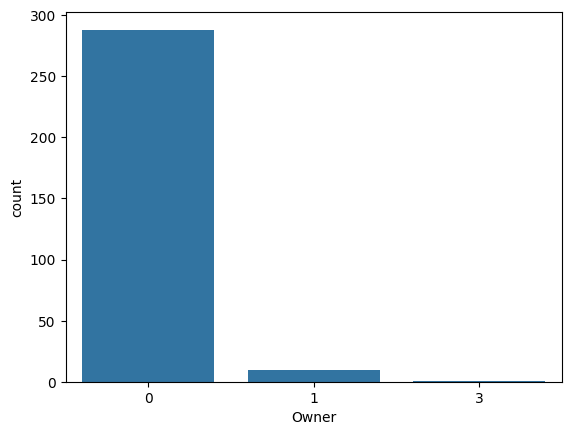

In [38]:
# Owner distribution

sns.countplot(x = 'Owner', data = df_cleaned)
print(df_cleaned['Owner'].value_counts())

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64


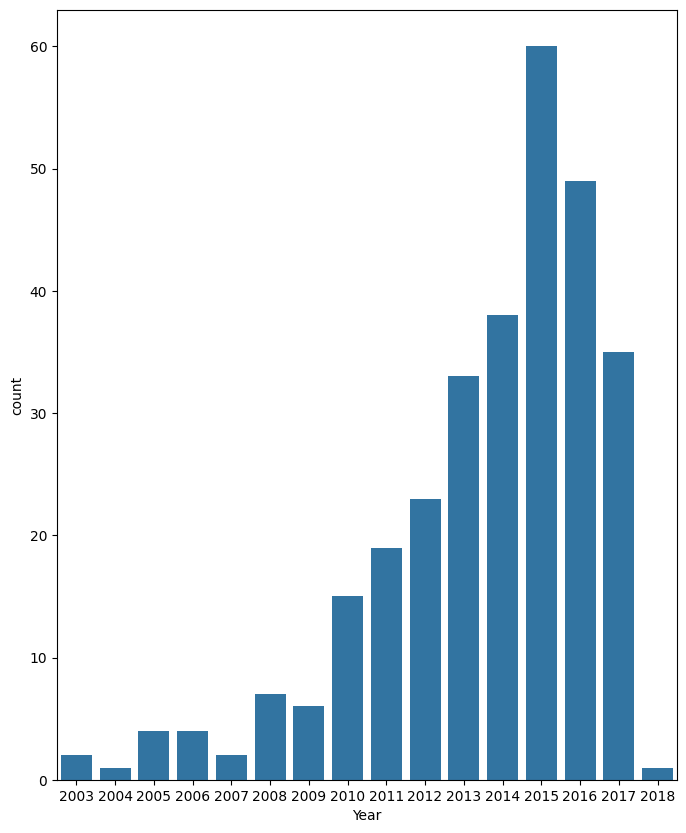

In [39]:
# Year distribution

plt.figure(figsize = (8,10))
sns.countplot(x = 'Year', data = df_cleaned)
print(df_cleaned['Year'].value_counts())

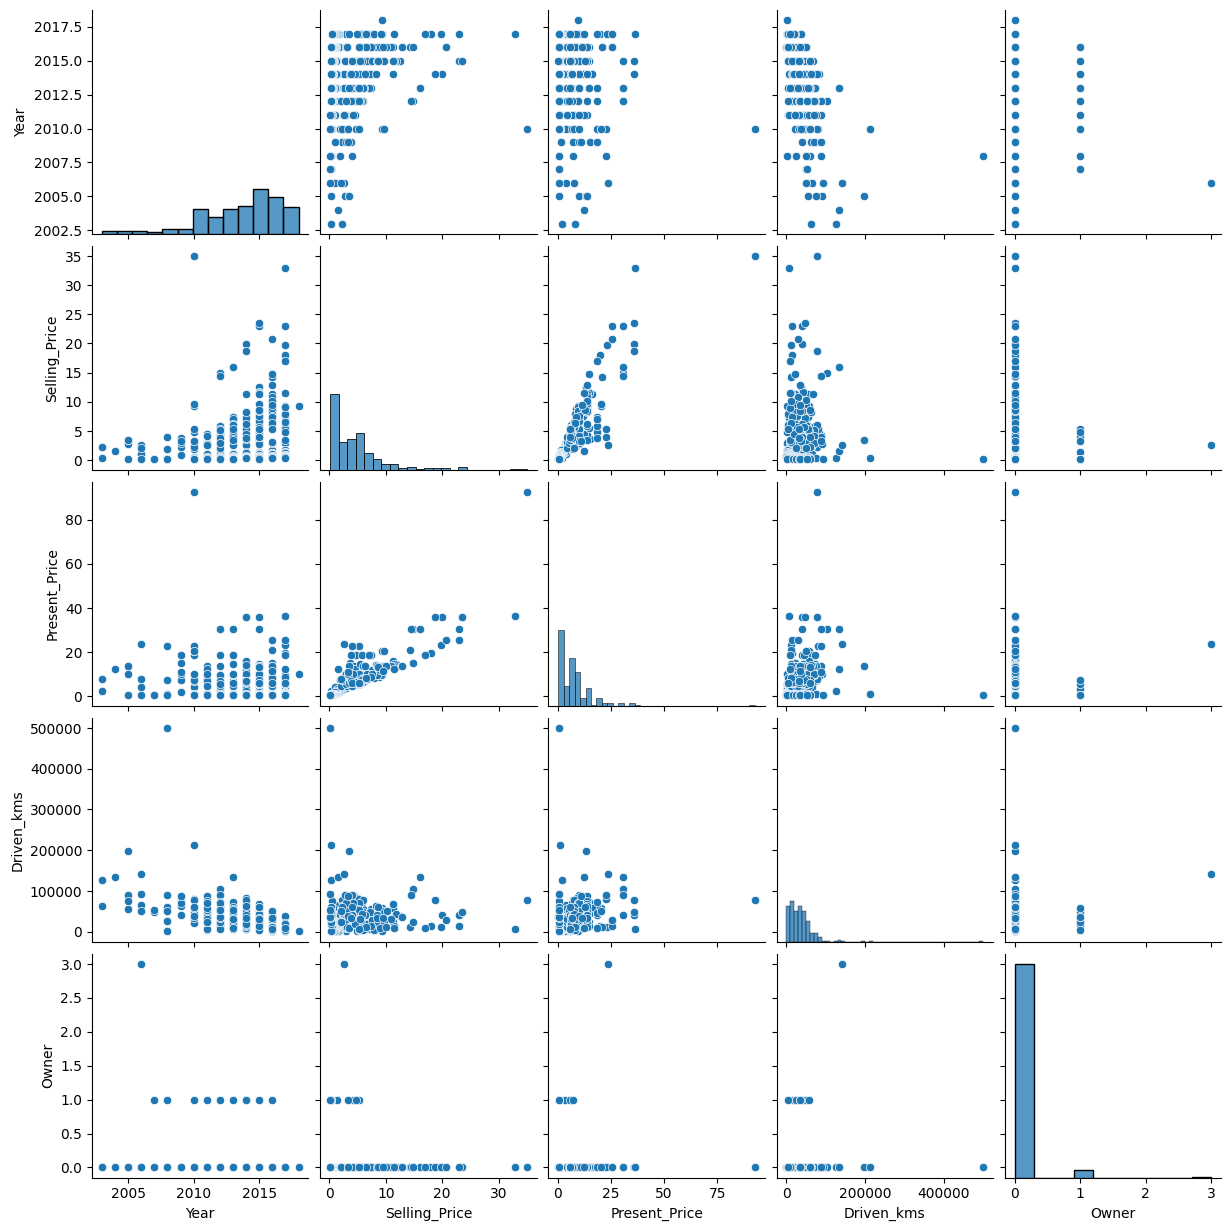

In [40]:
# pairplot of features

sns.pairplot(df_cleaned)

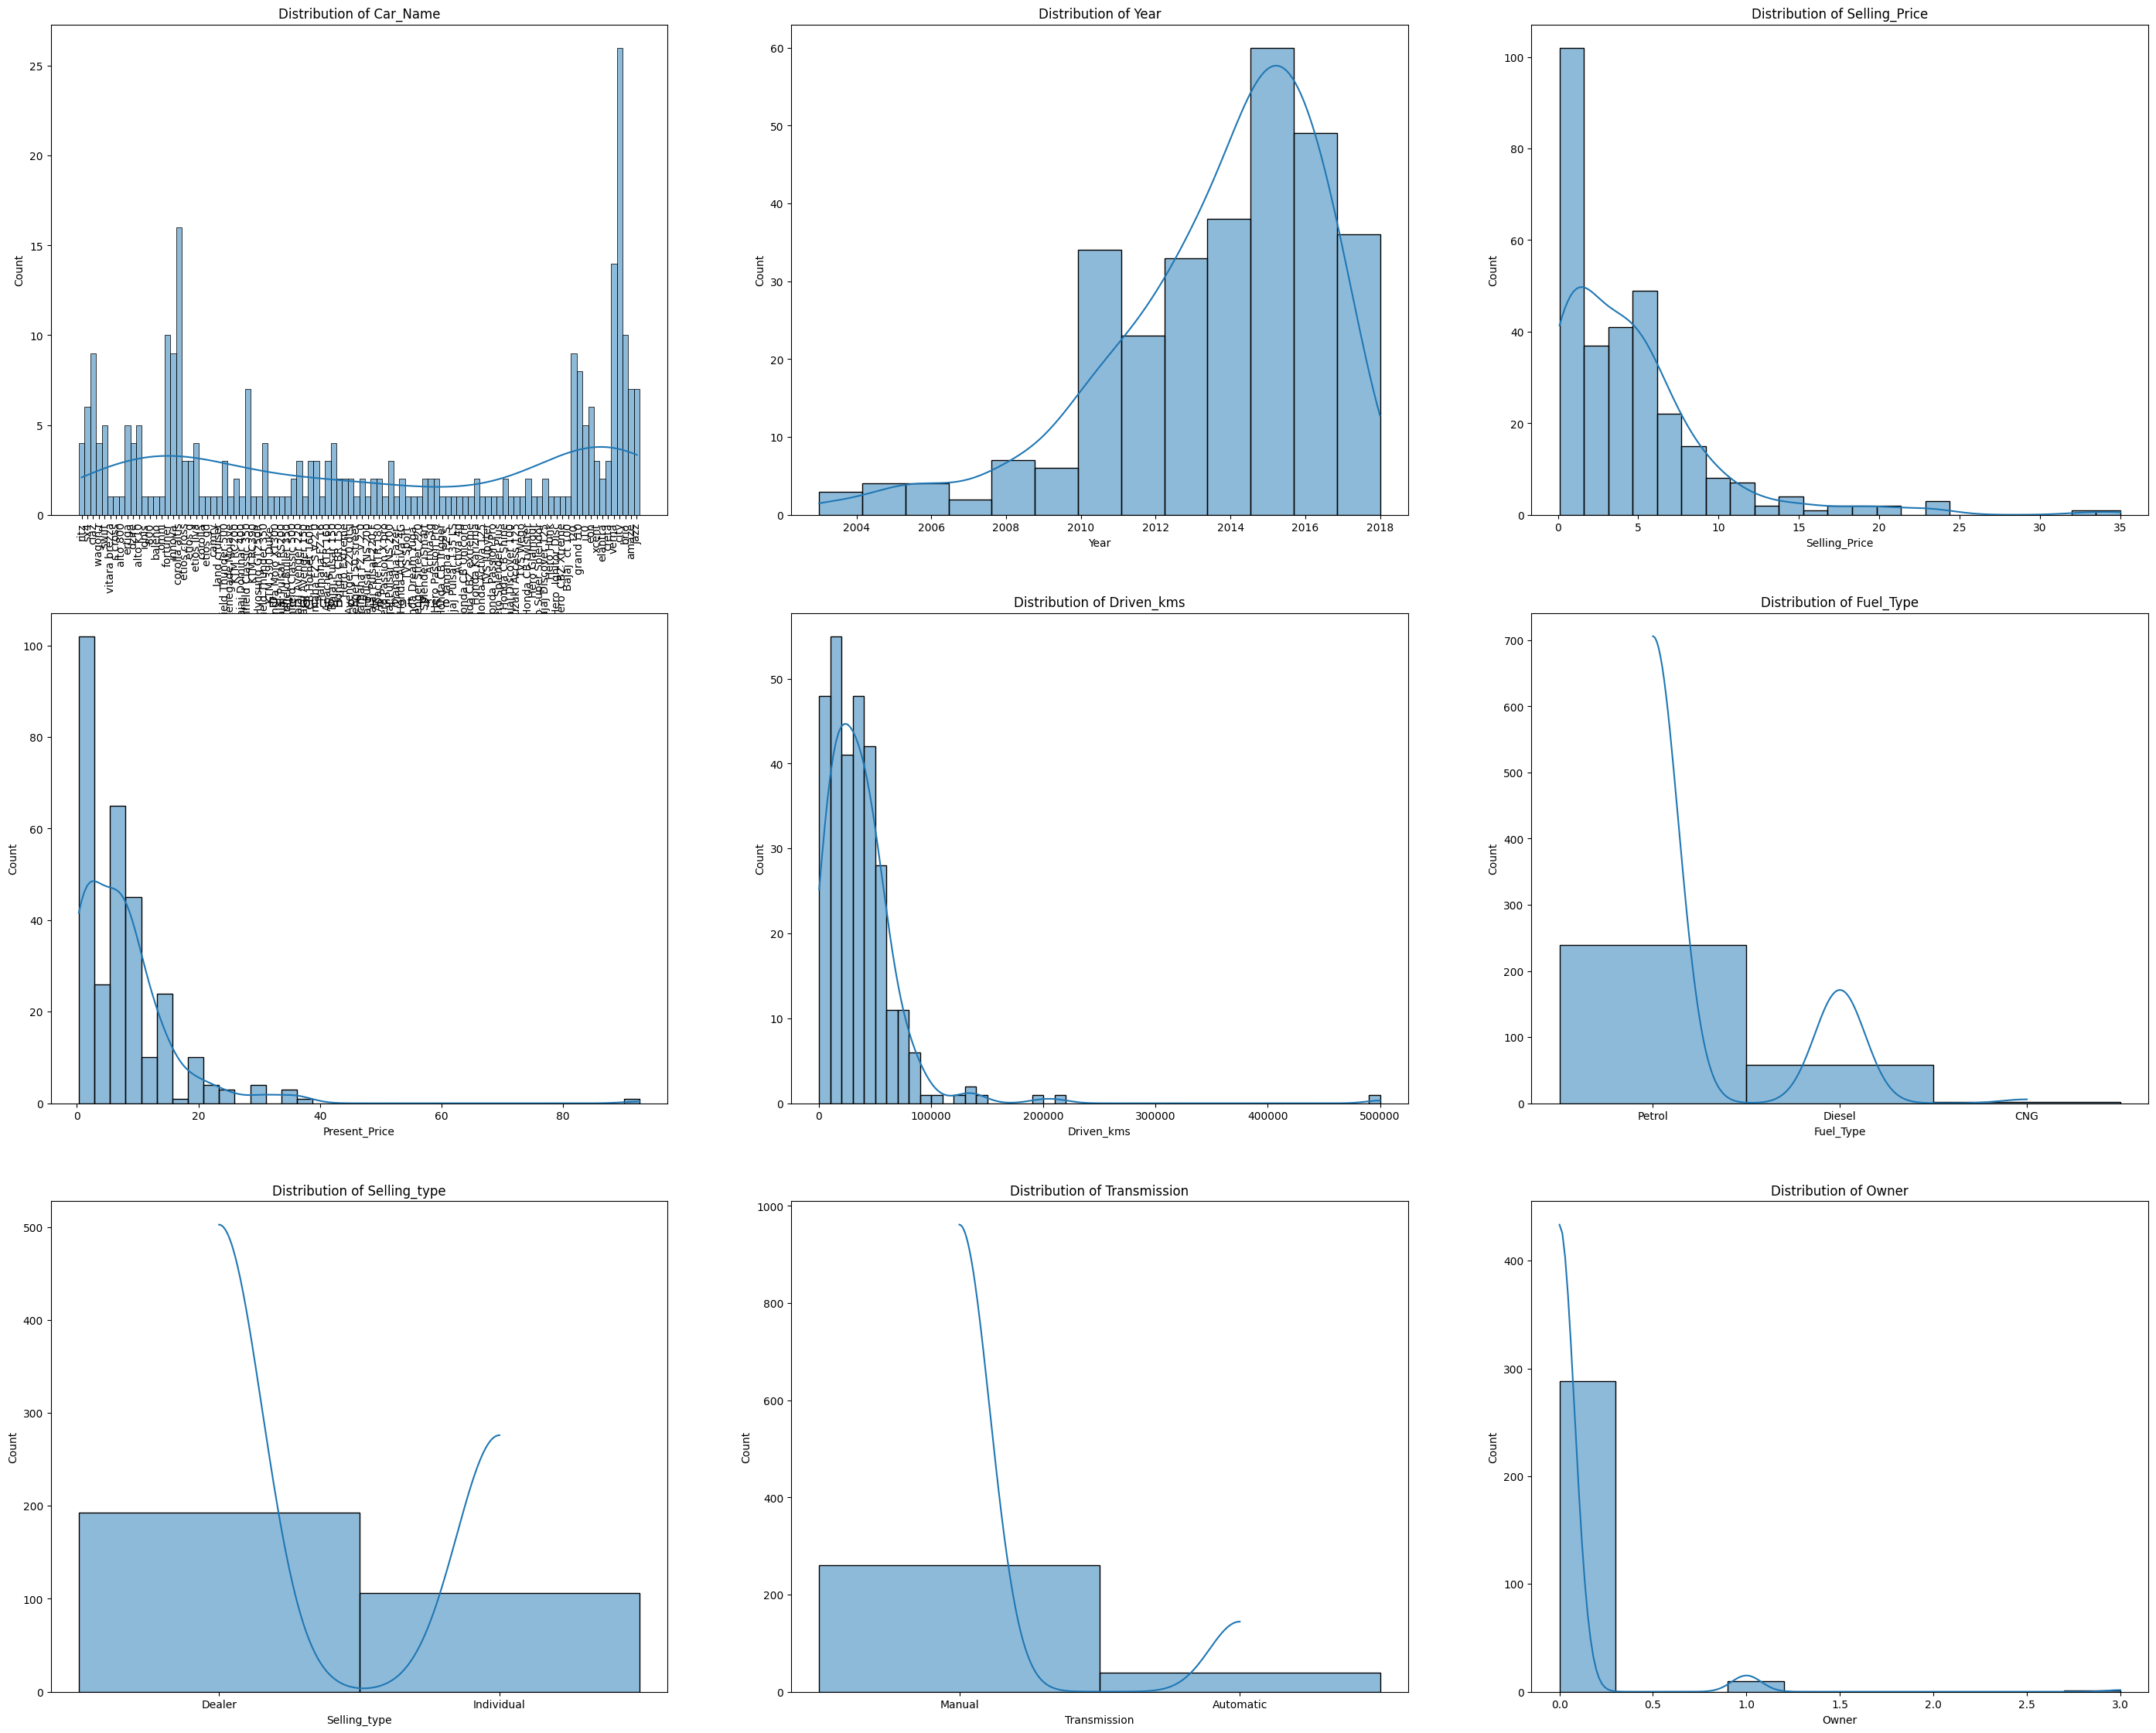

In [41]:
# histogram of features

plt.figure(figsize = (35,28))
for i, col in enumerate(df_cleaned.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df_cleaned[col], kde = True,)
    if col == 'Car_Name':
        plt.xticks(rotation = 'vertical')
    else:
        plt.xticks(rotation = 0)
    plt.title(f'Distribution of {col}')

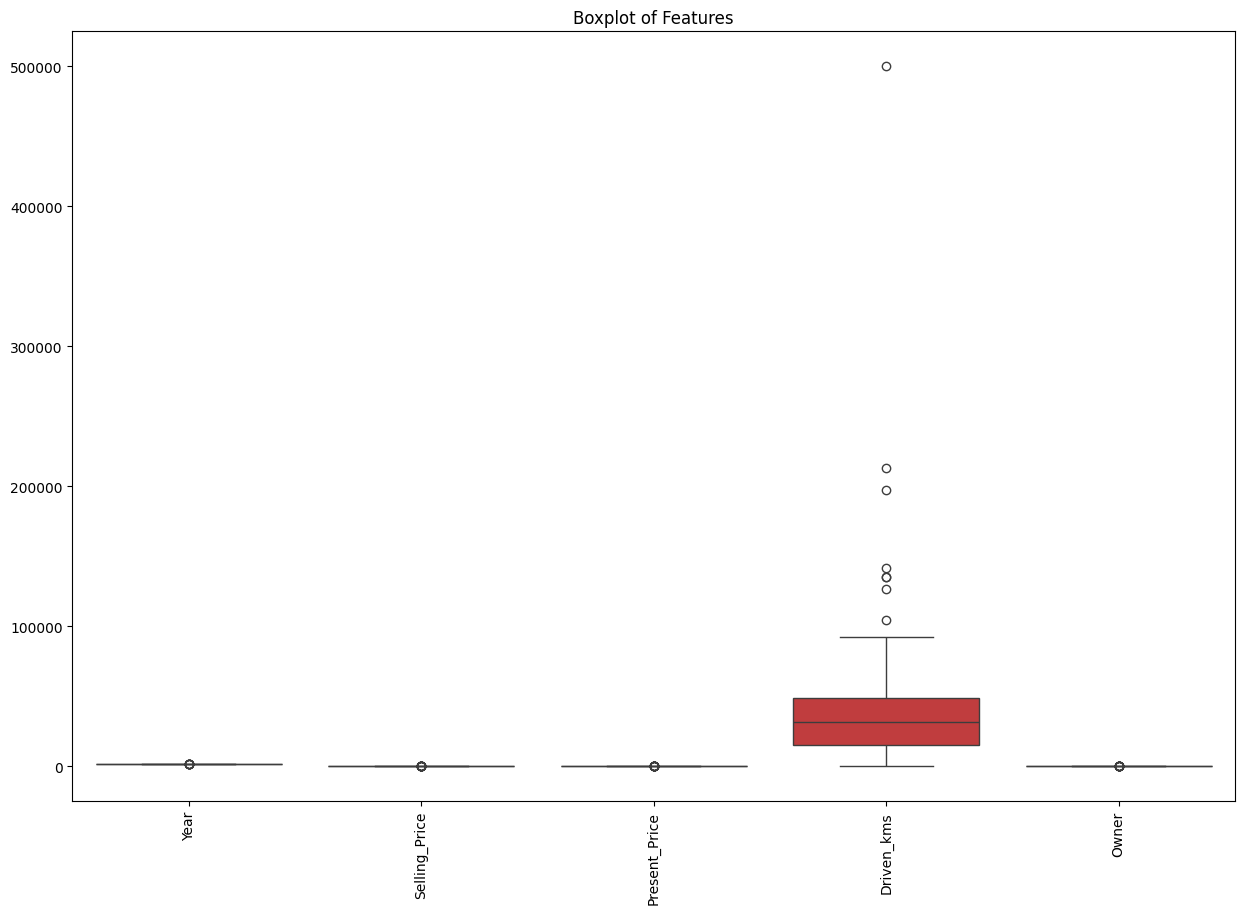

In [42]:
# Boxplot of features

plt.figure(figsize = (15,10))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
sns.boxplot(data = df_cleaned)
plt.show()

In [43]:
# checking for outliers

required_columns = df_cleaned.drop(columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']).columns

for i in required_columns:

    q1 = df_cleaned[i].quantile(0.25)
    q3 = df_cleaned[i].quantile(0.75)
    iqr = q3 - q1

    lower_whisker_value = q1 - 1.5 * iqr
    upper_whisker_value = q3 + 1.5 * iqr

    outliers_iqr = (df_cleaned[i] < lower_whisker_value) | (df_cleaned[i] > upper_whisker_value)

# Print indices of outliers
    print(f'{i} - Outliers:', outliers_iqr.sum())

Year - Outliers: 7
Selling_Price - Outliers: 16
Present_Price - Outliers: 14
Driven_kms - Outliers: 8
Owner - Outliers: 11


In [44]:
# checking zeros count

zeros_count = (df_cleaned == 0).sum()

# Display the count of 0's for each column
print("Count of 0's in Each Column:")
print(zeros_count)

Count of 0's in Each Column:
Car_Name           0
Year               0
Selling_Price      0
Present_Price      0
Driven_kms         0
Fuel_Type          0
Selling_type       0
Transmission       0
Owner            288
dtype: int64


In [45]:
# removing unnecessary columns

df_new = df_cleaned.drop(columns = 'Car_Name')
df_new

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [46]:
# encoding categorical variables

df_encoded = pd.get_dummies(df_new, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
df_encoded

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,True,False,False,True
297,2015,4.00,5.90,60000,0,False,True,False,True
298,2009,3.35,11.00,87934,0,False,True,False,True
299,2017,11.50,12.50,9000,0,True,False,False,True


### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()

X = df_encoded.drop(columns = 'Selling_Price')
y = df_encoded['Selling_Price']

### Dateset Splitting, Model Building and Evaluation

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler and apply only to training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store results
results = {
    "Model": [],
    "RMSE": [],
    "R2_Score": []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results["Model"].append(model_name)
    results["RMSE"].append(rmse)
    results["R2_Score"].append(r2)

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,RMSE,R2_Score
0,Linear Regression,2.524505,0.752723
1,Ridge Regression,2.521988,0.753216
2,Lasso Regression,2.472173,0.762869
3,Decision Tree,2.083776,0.831526
4,Gradient Boosting,2.762978,0.703800
